In [1]:
# Importing the required packages 
import numpy as np 
import pandas as pd 
from sklearn.metrics import confusion_matrix 
from sklearn.cross_validation import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from scipy import stats
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from pandas import read_csv, DataFrame
from sklearn import tree
from os import system

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#loading the data
df = pd.read_csv('movie_data.csv')
print(df)

                                 Movie  Percent Positive Tweets  \
0                  Mary Queen of Scots                 0.739130   
1                             Dumplin’                 0.877384   
2                              Vox Lux                 0.802632   
3                          Ben Is Back                 0.851485   
4    Spider-Man: Into the Spider-Verse                 0.635719   
5                       Mortal Engines                 0.738739   
6                             The Mule                 0.650685   
7                                 Roma                 0.836232   
8                            Backtrace                 0.500000   
9                            Capernaum                 0.756757   
10                Mary Poppins Returns                 0.717276   
11                             Aquaman                 0.645855   
12                           Bumblebee                 0.925620   
13                            Cold War                 0.58011

In [3]:
#selecting the required columns
df = df[['Movie', 'Percent Positive Tweets', 'Percent Negative Tweets', 'Rotten Tomatoes User Ratings',
       'Percentage of Users who want to see (%)', 'Director', 'Actor', 'Actress', 'Production house rating']]

In [4]:
#selecting the first 45 rows
df = df[:45]

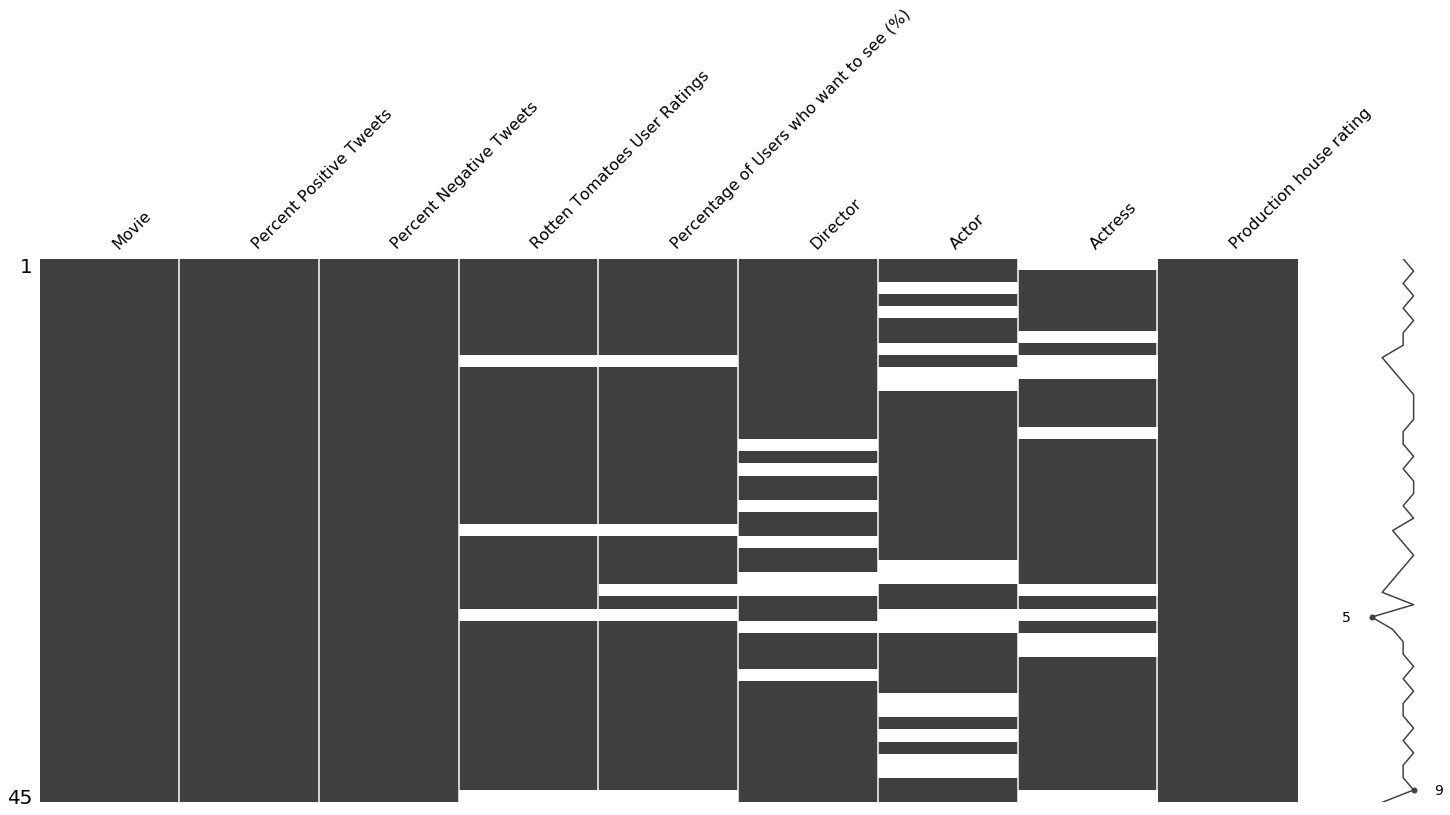

In [5]:
msno.matrix(df)

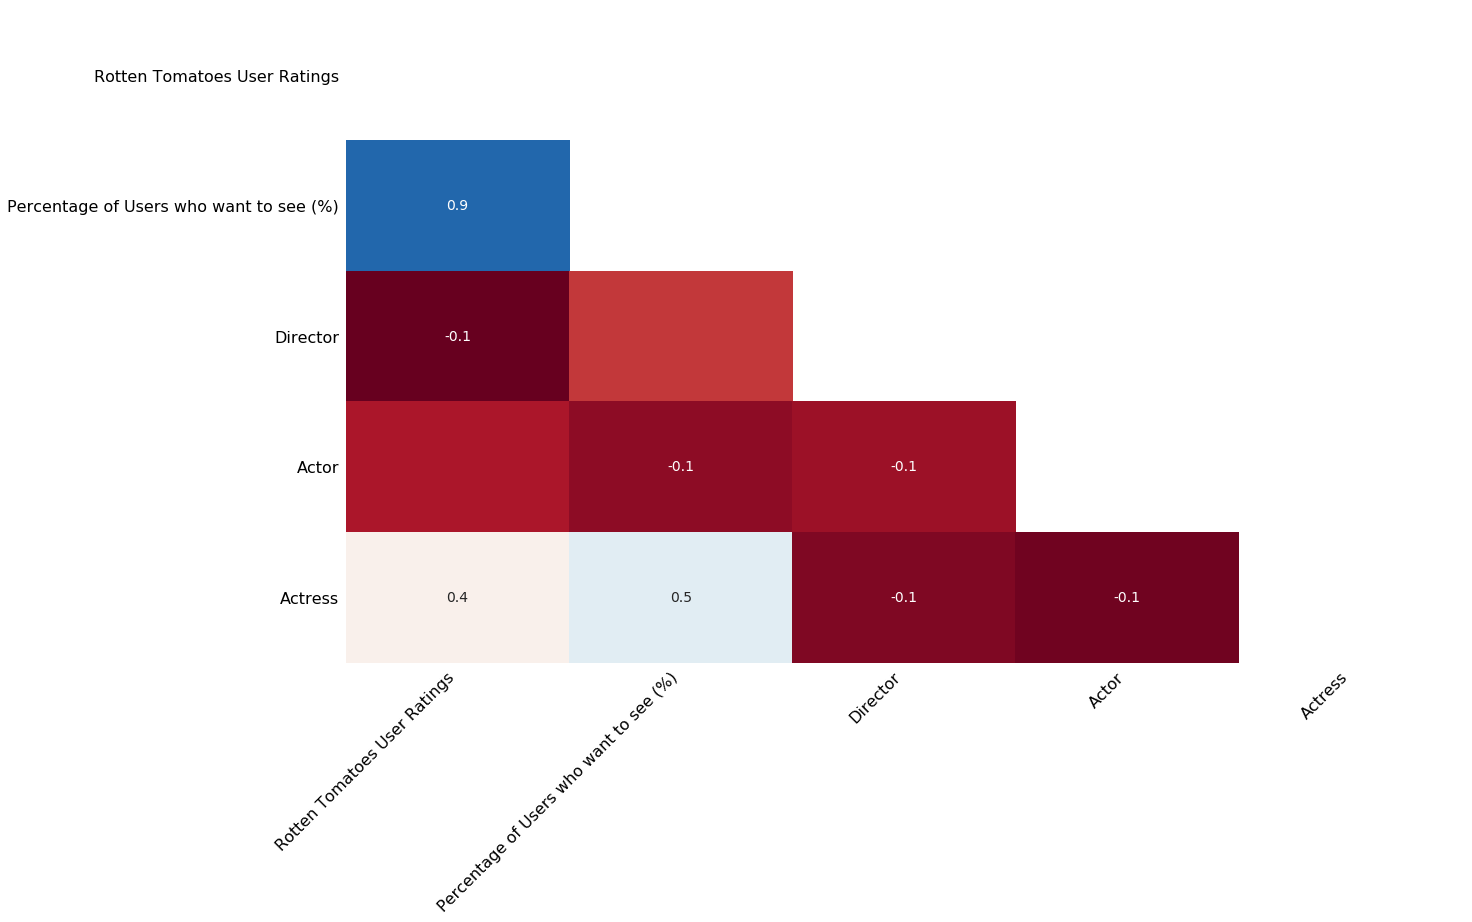

In [6]:
msno.heatmap(df)

In [7]:
#replacing NaN values with the median of the respective columns
df ['Rotten Tomatoes User Ratings'] = df ['Rotten Tomatoes User Ratings'].fillna(df ['Rotten Tomatoes User Ratings'].median() )
df ['Percentage of Users who want to see (%)'] = df ['Percentage of Users who want to see (%)'].fillna(df ['Percentage of Users who want to see (%)'].median() )
df ['Director'] = df ['Director'].fillna(df ['Director'].median() )
df ['Actor'] = df ['Actor'].fillna(df ['Actor'].median() )
df ['Actress'] = df ['Actress'].fillna(df ['Actress'].median() )

In [8]:
#Normalizing data
df ['Percent Positive Tweets'] = (df ['Percent Positive Tweets'] - df ['Percent Positive Tweets'].mean())/df ['Percent Positive Tweets'].std() 
df ['Percent Negative Tweets'] = (df ['Percent Negative Tweets'] - df ['Percent Negative Tweets'].mean())/df ['Percent Negative Tweets'].std() 
df ['Rotten Tomatoes User Ratings'] = (df ['Rotten Tomatoes User Ratings'] - df ['Rotten Tomatoes User Ratings'].mean())/df ['Rotten Tomatoes User Ratings'].std()
df ['Percentage of Users who want to see (%)'] = (df ['Percentage of Users who want to see (%)'] - df ['Percentage of Users who want to see (%)'].mean())/df ['Percentage of Users who want to see (%)'].std()
df ['Director'] = (df ['Director'] - df ['Director'].mean())/df ['Director'].std()
df ['Actor'] = (df ['Actor'] - df ['Actor'].mean())/df ['Actor'].std()
df ['Actress'] = (df ['Actress'] - df ['Actress'].mean())/df ['Actress'].std()

In [9]:
df_copy = df
df_copy ['Production house rating'] = pd.to_numeric(df_copy ['Production house rating'], errors = 'coerce')
df_copy ['Production house rating'] = df_copy ['Production house rating'].fillna(df_copy ['Production house rating'].median() )
df_copy ['Production house rating'] = (df_copy ['Production house rating'] - df_copy ['Production house rating'].mean())/df_copy ['Production house rating'].std()

In [10]:
df

,Movie,Percent Positive Tweets,Percent Negative Tweets,Rotten Tomatoes User Ratings,Percentage of Users who want to see (%),Director,Actor,Actress,Production house rating
0,Mary Queen of Scots,-0.146363,0.146363,-0.195128,0.766739,-0.247467,-0.298245,-0.243076,0.088300
1,Dumplin’,0.640983,-0.640983,-0.256079,-1.475349,-0.280473,-0.297878,-0.252555,-2.335992
2,Vox Lux,0.215276,-0.215276,-0.228586,0.268497,-0.280372,-0.289883,-0.251006,0.078642
3,Ben Is Back,0.493490,-0.493490,-0.240517,-0.478866,-0.280678,-0.298180,-0.121435,-0.694041
4,Spider-Man: Into the Spider-Verse,-0.735280,0.735280,-0.167116,0.019376,-0.273879,-0.289883,0.019785,-0.143504
5,Mortal Engines,-0.148590,0.148590,-0.200704,0.019376,-0.280437,-0.297798,-0.262100,1.720593
6,The Mule,-0.650050,0.650050,-0.231828,1.015859,-0.179033,-0.286099,-0.243076,0.300788
7,Roma,0.406625,-0.406625,-0.174508,1.015859,-0.113440,-0.289883,-0.252693,1.817178
8,Backtrace,-1.508190,1.508190,-0.235200,0.143936,-0.276323,0.167651,-0.243076,-0.298041
9,Capernaum,-0.045979,0.045979,-0.245315,-1.226228,0.749665,-0.289883,-0.243076,-0.066236


In [11]:
##K-Means Clustering 
#Standardize
clmns = ['Percent Positive Tweets', 'Percent Negative Tweets', 'Rotten Tomatoes User Ratings',
       'Percentage of Users who want to see (%)', 'Director', 'Actor', 'Actress', 'Production house rating']

df_tr = df[clmns]

#df_tr_std = stats.zscore(df_tr[clmns])

#Cluster the data
kmeans = KMeans(n_clusters=2, random_state=0).fit(df_tr)
labels = kmeans.labels_

#Glue back to originaal data
df_tr['clusters'] = labels

#Add the column into our list
clmns.extend(['clusters'])

#Lets analyze the clusters
print(df_tr[clmns].groupby(['clusters']).mean())

          Percent Positive Tweets  Percent Negative Tweets  \
clusters                                                     
0                        0.690594                -0.690594   
1                       -0.863242                 0.863242   

          Rotten Tomatoes User Ratings  \
clusters                                 
0                             0.122939   
1                            -0.153674   

          Percentage of Users who want to see (%)  Director     Actor  \
clusters                                                                
0                                       -0.389182  0.084273  0.208395   
1                                        0.486478 -0.105341 -0.260494   

           Actress  Production house rating  
clusters                                     
0        -0.099737                -0.285060  
1         0.124672                 0.356325  


In [12]:
df_tr

,Percent Positive Tweets,Percent Negative Tweets,Rotten Tomatoes User Ratings,Percentage of Users who want to see (%),Director,Actor,Actress,Production house rating,clusters
0,-0.146363,0.146363,-0.195128,0.766739,-0.247467,-0.298245,-0.243076,0.088300,1
1,0.640983,-0.640983,-0.256079,-1.475349,-0.280473,-0.297878,-0.252555,-2.335992,0
2,0.215276,-0.215276,-0.228586,0.268497,-0.280372,-0.289883,-0.251006,0.078642,0
3,0.493490,-0.493490,-0.240517,-0.478866,-0.280678,-0.298180,-0.121435,-0.694041,0
4,-0.735280,0.735280,-0.167116,0.019376,-0.273879,-0.289883,0.019785,-0.143504,1
5,-0.148590,0.148590,-0.200704,0.019376,-0.280437,-0.297798,-0.262100,1.720593,1
6,-0.650050,0.650050,-0.231828,1.015859,-0.179033,-0.286099,-0.243076,0.300788,1
7,0.406625,-0.406625,-0.174508,1.015859,-0.113440,-0.289883,-0.252693,1.817178,1
8,-1.508190,1.508190,-0.235200,0.143936,-0.276323,0.167651,-0.243076,-0.298041,1
9,-0.045979,0.045979,-0.245315,-1.226228,0.749665,-0.289883,-0.243076,-0.066236,0


In [13]:
X = df_tr.values[:, 0:7]
Y = df_tr.values[:,8]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 100)

In [15]:
##Decision Tree Classification Algorithm
# Function to perform training with giniIndex. 
def train_using_gini(X_train, X_test, y_train): 
  
    # Creating the classifier object 
    clf_gini = DecisionTreeClassifier(criterion = "gini", 
            random_state = 100,max_depth=3, min_samples_leaf=5) 
  
    # Performing training 
    clf_gini.fit(X_train, y_train) 
    return clf_gini 
      
# Function to perform training with entropy. 
def tarin_using_entropy(X_train, X_test, y_train): 
  
    # Decision tree with entropy 
    clf_entropy = DecisionTreeClassifier( 
            criterion = "entropy", random_state = 100, 
            max_depth = 3, min_samples_leaf = 5) 
  
    # Performing training 
    clf_entropy.fit(X_train, y_train) 
    return clf_entropy 
  
  
# Function to make predictions 
def prediction(X_test, clf_object): 
  
    # Predicton on test with giniIndex 
    y_pred = clf_object.predict(X_test) 
    print("Predicted values:") 
    print(y_pred) 
    return y_pred 
      
# Function to calculate accuracy 
def cal_accuracy(y_test, y_pred): 
      
    print("Confusion Matrix: ", 
        confusion_matrix(y_test, y_pred)) 
      
    print ("Accuracy : ", 
    accuracy_score(y_test,y_pred)*100) 
      
    print("Report : ", 
    classification_report(y_test, y_pred)) 


In [16]:
clf_gini = train_using_gini(X_train, X_test, y_train) 
clf_entropy = tarin_using_entropy(X_train, X_test, y_train) 
      
# Operational Phase 
print("Results Using Gini Index:") 
      
# Prediction using gini 
y_pred_gini = prediction(X_test, clf_gini) 
cal_accuracy(y_test, y_pred_gini) 
      
print("Results Using Entropy:") 
# Prediction using entropy 
y_pred_entropy = prediction(X_test, clf_entropy) 
cal_accuracy(y_test, y_pred_entropy)

Results Using Gini Index:
Predicted values:
[1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
Confusion Matrix:  [[7 0]
 [4 3]]
Accuracy :  71.42857142857143
Report :               precision    recall  f1-score   support

        0.0       0.64      1.00      0.78         7
        1.0       1.00      0.43      0.60         7

avg / total       0.82      0.71      0.69        14

Results Using Entropy:
Predicted values:
[1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
Confusion Matrix:  [[7 0]
 [4 3]]
Accuracy :  71.42857142857143
Report :               precision    recall  f1-score   support

        0.0       0.64      1.00      0.78         7
        1.0       1.00      0.43      0.60         7

avg / total       0.82      0.71      0.69        14



In [17]:
##visualizing Decision tree classification 
Y = df_tr.iloc[:, 8]
X = df_tr.iloc[:, 0:7]

dtree = tree.DecisionTreeClassifier(criterion = "entropy")
dtree = dtree.fit(X, Y)

dotfile = open("dtree2.dot", 'w')
tree.export_graphviz(dtree, out_file = dotfile, feature_names = X.columns)
dotfile.close()
system("dot -Tpng D:.dot -o D:/dtree2.png")

32512

In [20]:
 # clustering dataset
from sklearn.cluster import KMeans
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt

[[8.28571429 2.        ]
 [1.6        5.2       ]
 [5.8        6.8       ]]


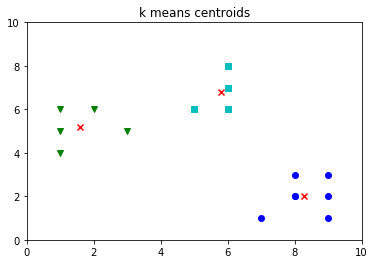

In [21]:
x1 = df

# create new plot and data
plt.plot()
X = np.array(list(zip(x1))).reshape(len(x1), 2)
colors = ['b', 'g', 'c']
markers = ['o', 'v', 's']

# KMeans algorithm 
K = 3
kmeans_model = KMeans(n_clusters=K).fit(X)

print(kmeans_model.cluster_centers_)
centers = np.array(kmeans_model.cluster_centers_)

plt.plot()
plt.title('k means centroids')

for i, l in enumerate(kmeans_model.labels_):
    plt.plot(x1[i], x2[i], color=colors[l], marker=markers[l],ls='None')
    plt.xlim([0, 10])
    plt.ylim([0, 10])

plt.scatter(centers[:,0:7], centers[:,8], marker="x", color='r')
plt.show()